In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [28]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


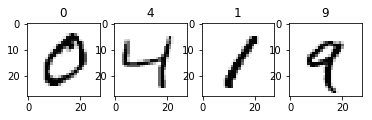

In [6]:
for i in xrange(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(X_train[i].reshape(28, 28), cmap='Greys')
    plt.title(np.argmax(y_train[i]))

In [11]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.5),
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128,
          nb_epoch=10, verbose=0,
          validation_split=0.1)

# Final test evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.059866017194371672)
('Test accuracy:', 0.98009999999999997)


## Exercise 1: Keras functional API

We'e built a model using the `Sequential API` from Keras. Keras also offers a [functional API](https://keras.io/getting-started/functional-api-guide/). This API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

Can you rewrite the model above using the functional API?

In [10]:
from keras.layers import Input, Dense
from keras.models import Model


inputs = Input(shape=(784,))
x = Dense(512, activation='relu')(inputs)
predictions = Dense(10, activation='softmax')(x)
model = Model(input=inputs, output=predictions)


# Train
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.5),
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128,
          nb_epoch=10, verbose=0,
          validation_split=0.1)

# Final test evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.060429253705905288)
('Test accuracy:', 0.98160000000000003)


## Exercise 2: Convolutional Recap

The above model is a very simple fully connected deep neural network. As we have seen, Convolutional Neural Networks are much more powerful when dealing with images. Below we've written a simple CNN model. In order to pass the data to this model the data needs to be reshaped as a 4D tensor.

As we will soon see, Tensorflow requires 4D tensors with this shape:

    N_images x Height x Width x Channels
    
1. Can you reshape X_train and X_test so that they have the correct shape?
2. Can you write a convolutional model using the sequential API?
3. Can you rewrite it using the functional API?

In [29]:
# put your reshape code here

# original shapes:
# X_train = (60000, 28, 28)
# X_test = (10000, 28, 28)
# y_train = (60000,)
# y_test = (10000,)

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [30]:
# it should be (60000, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [47]:
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Convolution2D, MaxPooling2D, Flatten

# Design a CNN using the sequential API
model = Sequential()

# 3x3 convolution on top, with 10  filters:
model.add(Convolution2D(10, 3, 3, border_mode='same', input_shape=(28, 28, 1)))  # tf ordering
print '1st CNN layer', model.output_shape

model.add(MaxPooling2D())

# 3x3 convolution on top, with 32 output filters:
#model.add(Convolution2D(32, 3, 3, border_mode='same'))
#print '2nd CNN layer', model.output_shape
#model.add(MaxPooling2D())

model.add(Flatten())
print 'Flattened CNN layer', model.output_shape

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()


# Fit your model
hist = model.fit(X_train, y_train, validation_split=0.2, nb_epoch=10, batch_size=32, verbose=2)  #

# Final test evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1st CNN layer (None, 28, 28, 10)
Flattened CNN layer (None, 1960)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_19 (Convolution2D) (None, 28, 28, 10)    100         convolution2d_input_7[0][0]      
____________________________________________________________________________________________________
maxpooling2d_20 (MaxPooling2D)   (None, 14, 14, 10)    0           convolution2d_19[0][0]           
____________________________________________________________________________________________________
flatten_15 (Flatten)             (None, 1960)          0           maxpooling2d_20[0][0]            
____________________________________________________________________________________________________
dense_39 (Dense)                 (None, 100)           196100      flatten_15[0][0]                 
___________________________________________________________________________________________

Train on 48000 samples, validate on 12000 samples
Epoch 1/10


8s - loss: 0.2896 - acc: 0.9126 - val_loss: 0.1216 - val_acc: 0.9647
Epoch 2/10


9s - loss: 0.1285 - acc: 0.9615 - val_loss: 0.0901 - val_acc: 0.9758
Epoch 3/10


8s - loss: 0.0920 - acc: 0.9727 - val_loss: 0.1038 - val_acc: 0.9683
Epoch 4/10


8s - loss: 0.0725 - acc: 0.9780 - val_loss: 0.0720 - val_acc: 0.9804
Epoch 5/10


8s - loss: 0.0647 - acc: 0.9802 - val_loss: 0.0723 - val_acc: 0.9796
Epoch 6/10


9s - loss: 0.0555 - acc: 0.9826 - val_loss: 0.0723 - val_acc: 0.9809
Epoch 7/10


9s - loss: 0.0508 - acc: 0.9847 - val_loss: 0.0676 - val_acc: 0.9805
Epoch 8/10


9s - loss: 0.0463 - acc: 0.9863 - val_loss: 0.0767 - val_acc: 0.9824
Epoch 9/10


9s - loss: 0.0446 - acc: 0.9865 - val_loss: 0.0744 - val_acc: 0.9832
Epoch 10/10


9s - loss: 0.0406 - acc: 0.9870 - val_loss: 0.0758 - val_acc: 0.9828


('Test score:', 0.07281535737511477)
('Test accuracy:', 0.98229999999999995)


In [46]:
# rewrite the above model using the functional API

input = Input(shape=(28, 28, 1))
conv = Convolution2D(10, 3, 3, border_mode='same')(input)
pool = MaxPooling2D()(conv)
flatten = Flatten()(pool)
d = Dense(100, activation='relu')(flatten)
drop = Dropout(0.2)(d)
predictions = Dense(10, activation='softmax')(drop)
model = Model(input=input, output=predictions)

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


# Fit your model
hist = model.fit(X_train, y_train, validation_split=0.2, 
                 nb_epoch=10, batch_size=32, verbose=2)  

# Final test evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_11 (InputLayer)            (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_18 (Convolution2D) (None, 28, 28, 10)    100         input_11[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_19 (MaxPooling2D)   (None, 14, 14, 10)    0           convolution2d_18[0][0]           
____________________________________________________________________________________________________
flatten_14 (Flatten)             (None, 1960)          0           maxpooling2d_19[0][0]            
___________________________________________________________________________________________

Train on 48000 samples, validate on 12000 samples
Epoch 1/10


9s - loss: 0.2782 - acc: 0.9156 - val_loss: 0.1201 - val_acc: 0.9658
Epoch 2/10


9s - loss: 0.1240 - acc: 0.9628 - val_loss: 0.0859 - val_acc: 0.9757
Epoch 3/10


9s - loss: 0.0917 - acc: 0.9720 - val_loss: 0.0761 - val_acc: 0.9781
Epoch 4/10


9s - loss: 0.0726 - acc: 0.9785 - val_loss: 0.0777 - val_acc: 0.9793
Epoch 5/10


9s - loss: 0.0616 - acc: 0.9810 - val_loss: 0.0742 - val_acc: 0.9804
Epoch 6/10


9s - loss: 0.0549 - acc: 0.9837 - val_loss: 0.0737 - val_acc: 0.9816
Epoch 7/10


9s - loss: 0.0504 - acc: 0.9839 - val_loss: 0.0764 - val_acc: 0.9797
Epoch 8/10


9s - loss: 0.0445 - acc: 0.9865 - val_loss: 0.0745 - val_acc: 0.9815
Epoch 9/10


9s - loss: 0.0408 - acc: 0.9872 - val_loss: 0.0722 - val_acc: 0.9826
Epoch 10/10


9s - loss: 0.0390 - acc: 0.9883 - val_loss: 0.0757 - val_acc: 0.9832


('Test score:', 0.073289981025282946)
('Test accuracy:', 0.98180000000000001)


## Exrcise 3: Discuss with the person next to you 

1. What are the pros/cons of the sequential API?
- What are the pros/cons of the functional API?
- What are the key differences between a Fully connected and a Convolutional neural network?
- What is a dropout layer? How does it work? Why does it help?


Answer:
* With the functional API you can branch out and combine the outputs, or skip layers, etc. See the Inception architecture for example.